#AG4 - Actividad Guiada 4
Nombre: Brandon Nick Gomez Aya <br>
Link:   https://colab.research.google.com/drive/1wrG6IQGL7pPW33VnCg0xA9P7LAkyUgRA#scrollTo=X-VlQjuJMWAT
<br>
Github: https://github.com/Nick738996/Optimizacion_Autobuses.git

#Carga de librerias

In [22]:
#!pip install requests    #Hacer llamadas http a paginas de la red
#!pip install tsplib95    #Modulo para las instancias del problema del TSP

!pip install requests                     #Hacer llamadas http a paginas de la red
!pip install tabulate>=0.9 networkx>=3.0  # Actualiza las librerías 'tabulate' y 'networkx' a version compatibles con tsplib95
                                          # tabulate: Ayuda a crear tablas de texto legibles para presentar datos.
                                          # networkx:  Sirve para trabajar con grafos y redes, y realizar análisis sobre estas estructuras.
!pip install tsplib95 --no-deps           #Modulo para las instancias del problema del TSP

#Carga de los datos del problema

In [23]:
import urllib.request #Hacer llamadas http a paginas de la red
import tsplib95       #Modulo para las instancias del problema del TSP
import math           #Modulo de funciones matematicas. Se usa para exp
import random         #Para generar valores aleatorios

#http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95
#Documentacion :
  # http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp95.pdf
  # https://tsplib95.readthedocs.io/en/stable/pages/usage.html
  # https://tsplib95.readthedocs.io/en/v0.6.1/modules.html
  # https://pypi.org/project/tsplib95/

#Descargamos el fichero de datos(Matriz de distancias)
file = "swiss42.tsp" ;
urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/swiss42.tsp.gz", file + '.gz')
!gzip -d swiss42.tsp.gz     #Descomprimir el fichero de datos

#Coordendas 51-city problem (Christofides/Eilon)
#file = "eil51.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/eil51.tsp.gz", file)

#Coordenadas - 48 capitals of the US (Padberg/Rinaldi)
#file = "att48.tsp" ; urllib.request.urlretrieve("http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/tsp/att48.tsp.gz", file)

gzip: swiss42.tsp already exists; do you wish to overwrite (y or n)? y


In [26]:
#Carga de datos y generación de objeto problem
###############################################################################
problem = tsplib95.load(file)

#Nodos
Nodos = list(problem.get_nodes())

#Aristas
Aristas = list(problem.get_edges())

In [27]:
Aristas
# https://github.com/ryanjoneil/tsplib/blob/master/elib.zib.de/pub/mp-testdata/tsp/tsplib/tsp/swiss42.tsp

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (0, 10),
 (0, 11),
 (0, 12),
 (0, 13),
 (0, 14),
 (0, 15),
 (0, 16),
 (0, 17),
 (0, 18),
 (0, 19),
 (0, 20),
 (0, 21),
 (0, 22),
 (0, 23),
 (0, 24),
 (0, 25),
 (0, 26),
 (0, 27),
 (0, 28),
 (0, 29),
 (0, 30),
 (0, 31),
 (0, 32),
 (0, 33),
 (0, 34),
 (0, 35),
 (0, 36),
 (0, 37),
 (0, 38),
 (0, 39),
 (0, 40),
 (0, 41),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12),
 (1, 13),
 (1, 14),
 (1, 15),
 (1, 16),
 (1, 17),
 (1, 18),
 (1, 19),
 (1, 20),
 (1, 21),
 (1, 22),
 (1, 23),
 (1, 24),
 (1, 25),
 (1, 26),
 (1, 27),
 (1, 28),
 (1, 29),
 (1, 30),
 (1, 31),
 (1, 32),
 (1, 33),
 (1, 34),
 (1, 35),
 (1, 36),
 (1, 37),
 (1, 38),
 (1, 39),
 (1, 40),
 (1, 41),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (2, 10),
 (2, 11),
 (2, 12),
 (2, 13),
 (2, 14),
 (2, 15),
 (2, 16),
 (2, 17),
 (2, 18),



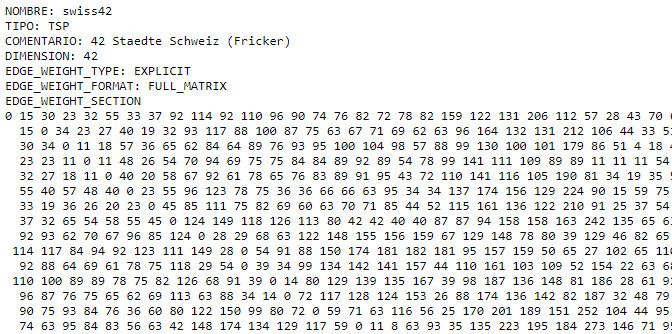

In [28]:
#Probamos algunas funciones del objeto problem

#Distancia entre nodos
problem.get_weight(3, 0)

#Todas las funciones
#Documentación: https://tsplib95.readthedocs.io/en/v0.6.1/modules.html

#dir(problem)

23

#Funcionas basicas


In [29]:
#Funcionas basicas
###############################################################################

# Genera una solución aleatoria con comienzo en el nodo 0
def crear_solucion(Nodos):
    """ Crea una solución aleatoria para el TSP, comenzando siempre en el nodo 0. """
    solucion = [Nodos[0]] + random.sample(Nodos[1:], len(Nodos) - 1)
    return solucion

# Calcula la distancia entre dos nodos en el problema TSP
def distancia(a, b, problem):
    """ Devuelve la distancia entre los nodos a y b en el problema dado. """
    return problem.get_weight(a, b)

# Calcula la distancia total de un recorrido en el TSP
def distancia_total(solucion, problem):
    """ Calcula la distancia total de la solución pasando por todos los nodos y regresando al inicio. """
    return sum(distancia(solucion[i], solucion[i+1], problem) for i in range(len(solucion) - 1)) + distancia(solucion[-1], solucion[0], problem)

# Prueba de la función con una instancia del problema
Nodos = list(range(42))  # Lista de nodos para el problema 'swiss42.tsp'
sol_temporal = crear_solucion(Nodos)

print("Solución inicial aleatoria:", sol_temporal)
print("Distancia total de la solución:", distancia_total(sol_temporal, problem))

Solución inicial aleatoria: [0, 14, 2, 15, 24, 25, 21, 28, 36, 1, 37, 4, 26, 41, 39, 22, 31, 18, 38, 30, 8, 23, 29, 16, 3, 34, 11, 9, 7, 17, 13, 19, 10, 35, 40, 5, 27, 6, 12, 32, 20, 33]
Distancia total de la solución: 4559


#BUSQUEDA ALEATORIA

In [30]:
###############################################################################
# BÚSQUEDA ALEATORIA
###############################################################################

def busqueda_aleatoria(problem, N):
    """
    Realiza una búsqueda aleatoria de soluciones para el TSP.

    Parámetros:
    - problem: Instancia del problema TSP cargada desde TSPLIB.
    - N: Número de iteraciones a realizar.

    Retorna:
    - mejor_solucion: Lista con la mejor ruta encontrada.
    - mejor_distancia: Distancia total de la mejor solución.
    """
    Nodos = list(problem.get_nodes())

    mejor_solucion = None
    mejor_distancia = float('inf')  # Inicializamos con un valor muy alto

    for _ in range(N):  # Se repite N veces
        solucion = crear_solucion(Nodos)  # Genera una solución aleatoria
        distancia = distancia_total(solucion, problem)  # Calcula la distancia total

        if distancia < mejor_distancia:  # Compara con la mejor obtenida hasta ahora
            mejor_solucion = solucion
            mejor_distancia = distancia

    print("\nMejor solución encontrada:")
    print("Ruta    :", mejor_solucion)
    print("Distancia: {:.2f}".format(mejor_distancia))  # Formatear la distancia con 2 decimales
    return mejor_solucion, mejor_distancia

# Ejecutar la búsqueda aleatoria con 50,000 iteraciones
solucion, mejor_distancia = busqueda_aleatoria(problem, 50000)


Mejor solución encontrada:
Ruta    : [0, 30, 9, 27, 26, 12, 29, 32, 38, 23, 2, 28, 16, 36, 8, 25, 41, 10, 40, 22, 31, 3, 18, 19, 7, 17, 33, 37, 5, 6, 4, 34, 20, 35, 13, 15, 14, 11, 21, 24, 39, 1]
Distancia: 3457.00


#BUSQUEDA LOCAL

In [31]:
###############################################################################
# BÚSQUEDA LOCAL (1 paso)
###############################################################################

def genera_vecina(solucion, problem):
    """
    Genera la mejor solución vecina usando el operador 2-opt, intercambiando dos nodos.

    Parámetros:
    - solucion: Lista con la ruta actual.
    - problem: Instancia del problema TSP con matriz de distancias.

    Retorna:
    - mejor_solucion: La mejor solución vecina encontrada.
    """
    mejor_solucion = solucion[:]  # Copiamos la solución original
    mejor_distancia = distancia_total(solucion, problem)  # Calculamos la distancia actual

    for i in range(1, len(solucion) - 1):  # Recorremos todos los nodos
        for j in range(i + 1, len(solucion)):
            # Generamos una nueva solución intercambiando los nodos i y j (operador 2-opt)
            vecina = solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

            # Calculamos la distancia de la solución vecina
            distancia_vecina = distancia_total(vecina, problem)

            # Si la nueva solución es mejor, la guardamos
            if distancia_vecina < mejor_distancia:
                mejor_distancia = distancia_vecina
                mejor_solucion = vecina

    return mejor_solucion

# Prueba con una solución inicial aleatoria
solucion = crear_solucion(list(problem.get_nodes()))
print("Distancia Solución Inicial:", distancia_total(solucion, problem))

nueva_solucion = genera_vecina(solucion, problem)
print("Distancia Mejor Solución Local:", distancia_total(nueva_solucion, problem))

Distancia Solución Inicial: 4479
Distancia Mejor Solución Local: 4122


In [32]:
###############################################################################
# BÚSQUEDA LOCAL (Iteraciones)
###############################################################################

def busqueda_local(solucion, problem):
    """
    Implementa una búsqueda local basada en 2-opt.

    Parámetros:
    - solucion: Solución inicial al problema TSP.
    - problem: Instancia del problema TSP con matriz de distancias.

    Retorna:
    - mejor_solucion: Ruta mejorada tras la búsqueda local.
    - mejor_distancia: Distancia total de la mejor solución.
    """
    solucion_referencia = solucion[:]  # Copia de la solución inicial
    mejor_distancia = distancia_total(solucion_referencia, problem)

    iteracion = 0  # Contador de iteraciones

    while True:
        iteracion += 1

        # Obtener la mejor vecina
        vecina = genera_vecina(solucion_referencia, problem)

        # Calcular la distancia de la vecina
        distancia_vecina = distancia_total(vecina, problem)

        # Si no mejora, terminamos la búsqueda (mínimo local)
        if distancia_vecina >= mejor_distancia:
            print(f"Iteración {iteracion}: No se encontró una mejor solución. Fin de la búsqueda.")
            print("Mejor solución encontrada:", solucion_referencia)
            print("Distancia:", mejor_distancia)
            return solucion_referencia, mejor_distancia

        # Actualizar la mejor solución encontrada
        solucion_referencia = vecina[:]
        mejor_distancia = distancia_vecina

solucion_optima, distancia_optima = busqueda_local(nueva_solucion, problem)

Iteración 39: No se encontró una mejor solución. Fin de la búsqueda.
Mejor solución encontrada: [0, 9, 39, 21, 24, 40, 23, 41, 8, 29, 34, 33, 20, 35, 36, 31, 17, 7, 37, 15, 16, 14, 19, 13, 5, 26, 18, 12, 11, 25, 10, 4, 6, 1, 3, 27, 2, 28, 30, 22, 38, 32]
Distancia: 1543


#SIMULATED ANNEALING


In [33]:
###############################################################################
# SIMULATED ANNEALING
###############################################################################

# Generador de una solución vecina aleatoria utilizando 2-opt
def genera_vecina_aleatorio(solucion):
    """
    Genera una solución vecina intercambiando dos nodos al azar (operador 2-opt).

    Parámetros:
    - solucion: Lista con la ruta actual.

    Retorna:
    - Nueva solución con dos nodos intercambiados.
    """
    i, j = sorted(random.sample(range(1, len(solucion)), 2))  # Garantiza i < j
    return solucion[:i] + [solucion[j]] + solucion[i+1:j] + [solucion[i]] + solucion[j+1:]

# Función de probabilidad para aceptar soluciones peores
def probabilidad(T, d):
    """
    Devuelve la probabilidad de aceptar una solución peor basada en la temperatura y diferencia de costos.

    Parámetros:
    - T: Temperatura actual.
    - d: Diferencia de distancia entre la solución actual y la nueva.

    Retorna:
    - True si la solución se acepta, False en caso contrario.
    """
    return random.random() < math.exp(-d / T)

# Función de descenso de temperatura
def bajar_temperatura(T, alpha=0.99):
    """
    Reduce la temperatura en cada iteración según el factor de enfriamiento.

    Parámetros:
    - T: Temperatura actual.
    - alpha: Factor de enfriamiento (por defecto 0.99).

    Retorna:
    - Nueva temperatura.
    """
    return T * alpha

In [34]:
def recocido_simulado(problem, TEMPERATURA, alpha=0.99, max_iter=10000):
    """
    Algoritmo de Recocido Simulado para resolver el TSP.

    Parámetros:
    - problem: Instancia del problema TSP.
    - TEMPERATURA: Temperatura inicial.
    - alpha: Factor de enfriamiento (por defecto 0.99).
    - max_iter: Número máximo de iteraciones (por defecto 10,000).

    Retorna:
    - mejor_solucion: Ruta óptima encontrada.
    - mejor_distancia: Distancia total de la mejor solución.
    """

    # Inicialización de la solución
    Nodos = list(problem.get_nodes())
    solucion_referencia = crear_solucion(Nodos)
    distancia_referencia = distancia_total(solucion_referencia, problem)

    mejor_solucion = solucion_referencia[:]  # Aseguramos una solución válida
    mejor_distancia = distancia_referencia

    N = 0  # Contador de iteraciones

    while TEMPERATURA > 1e-4 and N < max_iter:
        N += 1

        # Generar una solución vecina
        vecina = genera_vecina_aleatorio(solucion_referencia)
        distancia_vecina = distancia_total(vecina, problem)

        # Guardar la mejor solución encontrada siempre
        if distancia_vecina < mejor_distancia:
            mejor_solucion = vecina[:]
            mejor_distancia = distancia_vecina

        # Aceptar la solución vecina si es mejor o con cierta probabilidad si es peor
        delta = abs(distancia_referencia - distancia_vecina)
        if distancia_vecina < distancia_referencia or probabilidad(TEMPERATURA, delta):
            solucion_referencia = vecina[:]
            distancia_referencia = distancia_vecina

        # Reducir la temperatura
        TEMPERATURA = bajar_temperatura(TEMPERATURA, alpha)

    # Mostrar resultados finales
    print("\nRecocido Simulado Finalizado")
    print("Iteraciones realizadas:", N)
    print("Mejor solución encontrada:", mejor_solucion)
    print("Distancia total:", "{:.2f}".format(mejor_distancia))

    return mejor_solucion, mejor_distancia

# Ejecutar Recocido Simulado con temperatura inicial alta
solucion_sa, distancia_sa = recocido_simulado(problem, TEMPERATURA=1e6)


Recocido Simulado Finalizado
Iteraciones realizadas: 2292
Mejor solución encontrada: [0, 17, 36, 35, 31, 34, 33, 20, 32, 7, 19, 13, 16, 15, 37, 14, 18, 12, 41, 23, 9, 40, 24, 22, 38, 29, 8, 4, 5, 6, 26, 11, 25, 10, 21, 39, 30, 28, 3, 1, 2, 27]
Distancia total: 1908.00


#Representación en un grafo a partir de la matriz de distancias( Optimización de posiciones usando escalado multidimensional (MDS)



Multidimensional scaling problem(MDS):   https://en.wikipedia.org/wiki/Multidimensional_scaling

In [35]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from sklearn.manifold import MDS  # Multidimensional Scaling o Escalado Multidimensional

def plot_tsp_solution(distance_matrix, tsp_solution):
    """
    Dibuja el grafo de un TSP con las posiciones calculadas mediante MDS y muestra
    solo las aristas correspondientes a la solución del TSP.

    :param distance_matrix: np.ndarray, matriz de distancias entre nodos.
    :param tsp_solution: list, lista de nodos en el orden de la solución del TSP.
    """

    num_nodes = len(distance_matrix)

    # Crear un grafo vacío
    G = nx.Graph()

    # Agregar nodos al grafo
    G.add_nodes_from(range(num_nodes))

    # Usar MDS para calcular posiciones de los nodos
    mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42, normalized_stress='auto')
    positions = mds.fit_transform(distance_matrix)

    # Convertir las posiciones en un diccionario para networkx
    pos = {i: positions[i] for i in range(num_nodes)}

    # Crear un subgrafo con las aristas del camino TSP
    TSP_G = nx.Graph()
    for i in range(len(tsp_solution) - 1):
        u = tsp_solution[i]
        v = tsp_solution[i + 1]
        TSP_G.add_edge(u, v, weight=distance_matrix[u][v])

    # Dibujar el grafo
    plt.figure(figsize=(8, 6))

    # Dibujar nodos
    nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=500)

    # Dibujar todas las aristas del grafo original con baja opacidad (para contexto)
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if i != j:
                nx.draw_networkx_edges(G, pos, edgelist=[(i, j)], alpha=0.1, edge_color='gray')

    # Dibujar las aristas del camino TSP en rojo
    nx.draw_networkx_edges(TSP_G, pos, edge_color='red', width=2)

    # Añadir etiquetas a los nodos
    nx.draw_networkx_labels(G, pos, font_size=10, font_weight='bold')

    # Mostrar los pesos de las aristas del TSP
    edge_labels = nx.get_edge_attributes(TSP_G, 'weight')
    nx.draw_networkx_edge_labels(TSP_G, pos, edge_labels=edge_labels, font_size=8)

    plt.title("Grafo TSP con solución específica")
    plt.show()

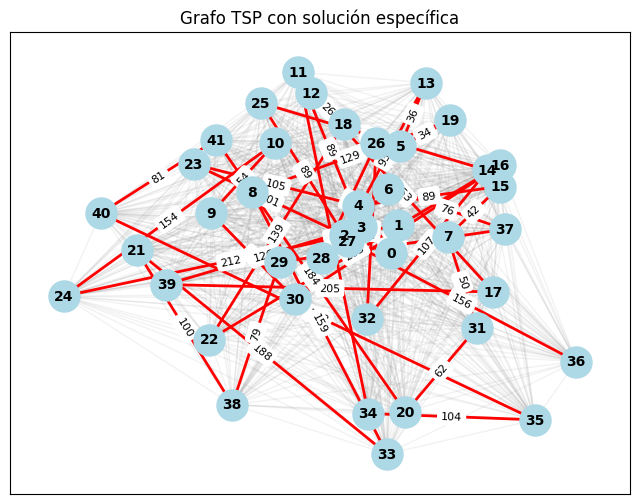

In [36]:
plot_tsp_solution(problem.edge_weights, crear_solucion(Nodos))

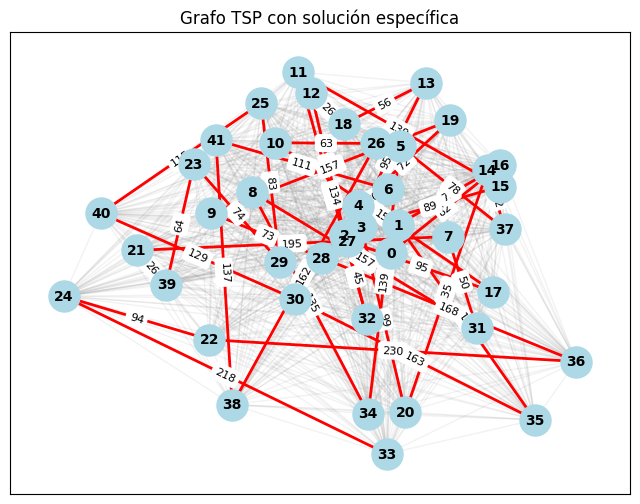

In [37]:
plot_tsp_solution(problem.edge_weights, solucion)